## SENTIMENT ANALYSIS ON REDDIT COMMENTS

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
import ast
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv("D:\\ADS\\Datasets\\Reddit_Data.csv")
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [34]:

print('There are', df.shape[0], 'reviews')
print("There are",len(df[df.duplicated()]),"duplicates")
print("There are",df.isnull().sum().sum(),"missing values")

There are 37249 reviews
There are 449 duplicates
There are 100 missing values


In [35]:
df.dropna(inplace=True)

In [36]:
#dropping duplicate rows
df = df.drop_duplicates() 
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [37]:
df.category.value_counts() 

 1    15771
 0    12778
-1     8250
Name: category, dtype: int64

* 1 -positive
* 0 -neutral
* -1-negative

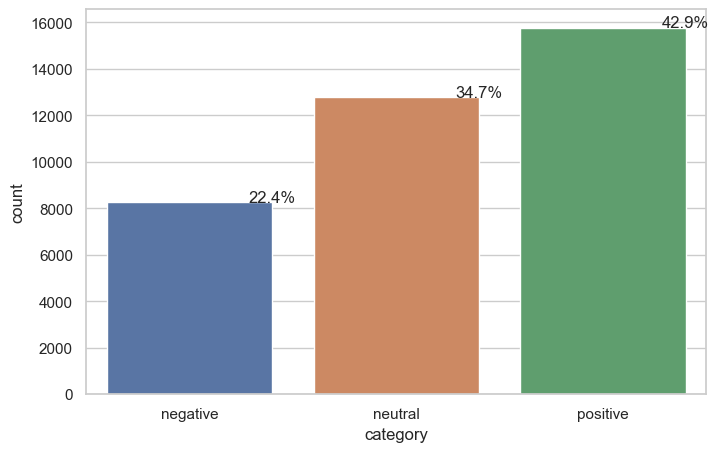

In [38]:
#exploring of "category" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="category", data=df)
ax.set_xticklabels(["negative","neutral","positive"])  # Set custom tick labels

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### TEXT PREPROCESSING

In [39]:
def clean_text(text):
    # Remove email addresses patterns 
    raw_comment = re.sub('\b[\w\-.]+?@\w+?\w+?\.\w{2,4}\b'," ",text)
    # Remove URLs  patterns
    raw_comment =re.sub("[^a-zA-Z]"," ",raw_comment)
    #Remove numbers
    raw_comment= re.sub("\d+(\.\d+)?"," ",raw_comment)
    return raw_comment

df["raw_comment"]=df["clean_comment"].apply(clean_text)

In [40]:
df['category'] = df['category'].replace({1:"positive",0:"neutral",-1:"negative"})

In [52]:
#df['POS tagg without Noun'] = df.apply(lambda row: RemoveNoun(row['POS tagged']), axis=1)
#Lemmatize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_sentence(sentence):
   
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['raw_comment'].apply(lemmatize_sentence)


,clean_comment,category,raw_comment,lemmatized_text
0,family mormon have never tried explain them t...,positive,family mormon have never tried explain them t...,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...,positive,buddhism has very much lot compatible with chr...,buddhism ha very much lot compatible with chri...
2,seriously don say thing first all they won get...,negative,seriously don say thing first all they won get...,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,neutral,what you have learned yours and only yours wha...,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,positive,for your own benefit you may want read living ...,for your own benefit you may want read living ...
...,...,...,...,...
37244,jesus,neutral,jesus,jesus
37245,kya bhai pure saal chutiya banaya modi aur jab...,positive,kya bhai pure saal chutiya banaya modi aur jab...,kya bhai pure saal chutiya banaya modi aur jab...
37246,downvote karna tha par upvote hogaya,neutral,downvote karna tha par upvote hogaya,downvote karna tha par upvote hogaya
37247,haha nice,positive,haha nice,haha nice


In [54]:
df.dropna()
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import numpy as np

# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(df['lemmatized_text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)


The size of the count matrix for the texts = (36799, 1048576)
The sparse count matrix is as follows:
  (0, 66497)	0.14002800840280097
  (0, 88541)	0.28005601680560194
  (0, 99311)	0.14002800840280097
  (0, 158803)	-0.28005601680560194
  (0, 176558)	0.14002800840280097
  (0, 180525)	-0.14002800840280097
  (0, 189643)	-0.14002800840280097
  (0, 216640)	-0.14002800840280097
  (0, 246361)	-0.14002800840280097
  (0, 281416)	-0.14002800840280097
  (0, 286878)	-0.28005601680560194
  (0, 298956)	0.14002800840280097
  (0, 331884)	-0.14002800840280097
  (0, 336791)	0.14002800840280097
  (0, 458997)	-0.14002800840280097
  (0, 570460)	-0.14002800840280097
  (0, 590295)	-0.14002800840280097
  (0, 636025)	0.14002800840280097
  (0, 639622)	-0.14002800840280097
  (0, 647008)	-0.14002800840280097
  (0, 694840)	0.14002800840280097
  (0, 699224)	-0.14002800840280097
  (0, 720710)	0.14002800840280097
  (0, 770962)	-0.14002800840280097
  (0, 777676)	0.14002800840280097
  :	:
  (36795, 612207)	-0.2085144140

In [55]:
#Getting X and y

X = tf_idf_matrix
y = df.category

#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  

In [56]:
#Creating, fitting and scoring classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print(f"Accuracy: {classifier.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 87.826%
